In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%config Completer.use_jedi = False
pd.set_option("display.max_rows", None, "display.max_columns", None)
from scipy.optimize import fsolve
ETA = 900

El problema hidrodinámico de la capa límite se reduce a resolver una ecuación diferencial ordinaria de tercer orden nolineal

$$2 \dfrac{d^3 f}{d \eta ^3} +  f \dfrac{d^2 f}{d \eta^2} =0$$

$$f'''+ \dfrac{1}{2} f f''=0$$

Las condiciones de frontera en términos de variables de similitud son

$$\dfrac{df}{d \eta} |_{\eta=0} = f(0)= 0,$$
$$\qquad  \qquad \dfrac{df}{d\eta} |_{\eta=\infty}  = 1$$

La solución de la ecuación (1) con las condiciones de frontera mencionadas, se obtiene mediante una expansión en serie o por integración numérica. En lo que sigue se muestran las funciones de capa límite para una placa plana.

En lo que sigue convertimos estas ecuaciones a un sistema de ecuaciones diferenciales de primer orden 

$$f_1=f$$
$$f_2=f_1'$$
$$f_3=f_2'$$
$$f_3'=- \dfrac{1}{2} f_1f_3$$



In [2]:
def blas(f,t):
    return (f[1],f[2],-0.5*f[0]*f[2])

eta = np.linspace(0,7,ETA)
f0  = [0,0,0.332]
f   = odeint(blas,f0,eta)

bl = pd.DataFrame(data={"n": np.round(eta,4), "f": f[:,0], "dfdn": f[:,1],"dfdn2": f[:,2]})
bl

,n,f,dfdn,dfdn2
0,0.0000,0.000000,0.000000,0.332000
1,0.0078,0.000010,0.002585,0.332000
2,0.0156,0.000040,0.005170,0.332000
3,0.0234,0.000091,0.007755,0.332000
4,0.0311,0.000161,0.010340,0.332000
5,0.0389,0.000252,0.012925,0.331999
6,0.0467,0.000362,0.015511,0.331999
7,0.0545,0.000493,0.018096,0.331999
8,0.0623,0.000644,0.020681,0.331998
9,0.0701,0.000815,0.023266,0.331997


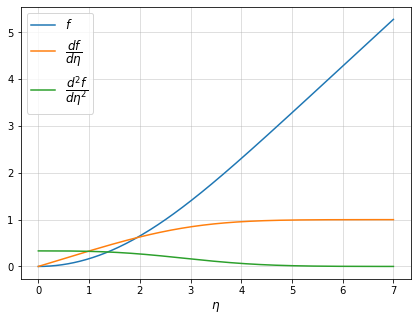

In [3]:
fig,ax = plt.subplots(figsize=(7,5))

ax.plot(bl.n,bl.f,label = '$f$')
ax.plot(bl.n,bl.dfdn,label='$\dfrac{df}{d \eta}$')
ax.plot(bl.n,bl.dfdn2,label='$\dfrac{d^2f}{d \eta^2}$')
ax.set_xlabel('$\eta$',fontsize=12)
ax.legend(fontsize=12)
ax.grid(which='major', alpha=0.5)

plt.show()

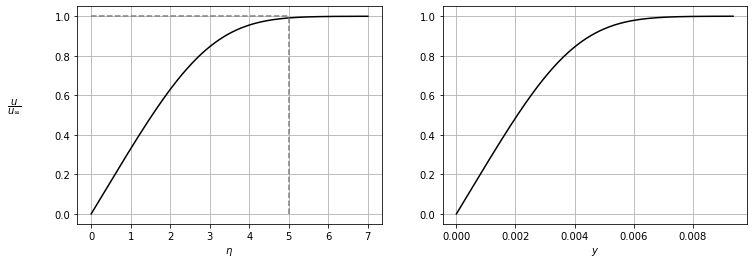

In [4]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

#graficamos u/ui(eta) que obtuvimos de la solución numérica
ax1.plot(bl.n,bl.dfdn,label='$\dfrac{df}{d \eta}$',color='black')
ax1.set_xlabel("$\eta$")
ax1.set_ylabel("$\dfrac{u}{u_{\infty}}$",rotation=0,labelpad=40)
ax1.hlines(y=1,xmin=0,xmax=5,colors='gray',linestyles='dashed')
ax1.vlines(x=5,ymin=0,ymax=1,colors='gray',linestyles='dashed')
ax1.grid()

#graficamos u/ui(y) 
ui    = 0.01
nu    = 0.00000179
x     = 0.01
eta = np.linspace(0,7,ETA)
y     = eta/np.sqrt(ui/(nu*x))
u     = ui*bl.dfdn

ax2.plot(y,u/ui,color='black')
ax2.set_xlabel("$y$")
ax2.grid()
plt.show()


plt.show()

Encontramos el borde de la capa límite cuando $u \approx 0.99 u_{\infty}$, esto pasa cuando $\eta=5.0$. Sustituimos este valor en la ecuación

$$\eta = y\sqrt{u_{\infty}/\nu x}.$$

De lo anterior, se define el espesor de la capa límite $\delta$ como el valor de $y$ para el que $u \approx 0.99 u_{\infty}$, esto es

$$\delta= \dfrac{5.0}{\sqrt{u_{\infty}/\nu x}}= \dfrac{5x}{\sqrt{Re_x}}$$






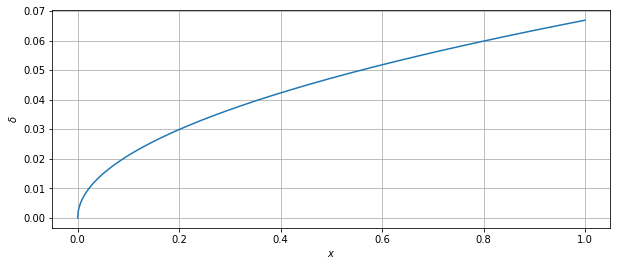

In [5]:
x    = np.linspace(0.000000001,1,ETA)
ui   = 0.01
nu   = 0.00000179
dlta = (5)/np.sqrt((ui)/(nu*x))
x0   = 0.01
eta  = np.linspace(0,7,ETA)
y    = eta/np.sqrt(ui/(nu*x0))
u    = ui*bl.dfdn


fig,ax = plt.subplots(figsize=(10,4))
ax.plot(x,dlta)
ax.set_xlabel('$x$')
ax.set_ylabel("$\delta$")
ax.grid()
plt.show()

Mientras más grande sea la velocidad del flujo, más delgada será la capa límite

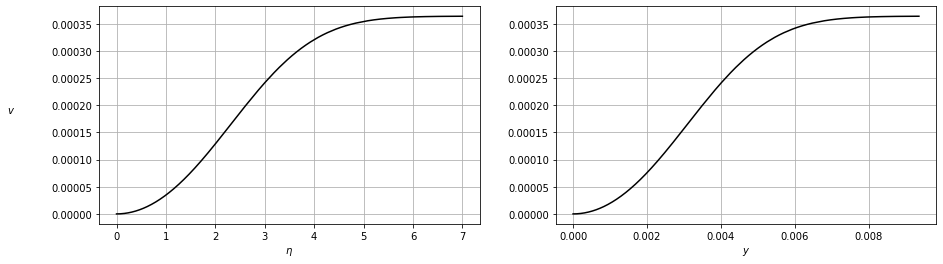

In [6]:
ui   = 0.01
nu   = 0.00000179
eta  = np.linspace(0,7,ETA)
y    = bl.n/np.sqrt(ui/(nu*x0))
#x    = np.linspace(0.00000001,1,710)
x    = 0.1
v    = 0.5*np.sqrt((nu*ui)/x)*((bl.n*bl.dfdn)-bl.f)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))

#graficamos u/ui(eta) que obtuvimos de la solución numérica
ax1.plot(eta,v,label='$\dfrac{df}{d \eta}$',color='black')
ax1.set_xlabel("$\eta$")
ax1.set_ylabel("$v$",rotation=0,labelpad=40)
ax1.grid()

#graficamos u/ui(y) 
ui    = 0.01
nu    = 0.00000179
x0    = 0.01
eta   = np.linspace(0,7,ETA)
y     = eta/np.sqrt(ui/(nu*x0))
u     = ui*bl.dfdn

ax2.plot(y,v,color='black')
ax2.set_xlabel("$y$")
ax2.grid()
plt.show()

/tmp/ipykernel_58840/952838248.py:3: RuntimeWarning: divide by zero encountered in true_divide
  ve    = 0.5*np.sqrt((nu*ui)/x)*((bl.n[500]*bl.dfdn[500])-bl.f[500])


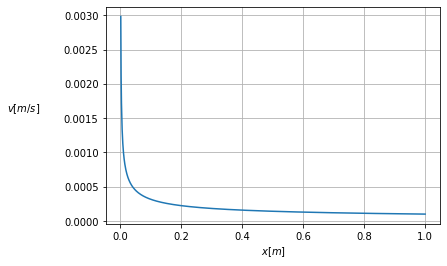

<Figure size 720x288 with 0 Axes>

In [7]:
#La velocidad en el borde de la capa límite
x    = np.linspace(0,1,ETA)
ve    = 0.5*np.sqrt((nu*ui)/x)*((bl.n[500]*bl.dfdn[500])-bl.f[500])

plt.plot(x,ve)
plt.grid()
plt.ylabel("$v[m/s]$",rotation=0,labelpad=40)
plt.xlabel("$x[m]$")
plt.figure(figsize=(10,4))
plt.show()

Los cambios en la componente transveral $v$ son muy pequeños comparados con la componente axial $u$

El esfuerzo cortante en la pared es

$$\tau_s = \mu \dfrac{\partial u}{\partial y}|_{y=0}= \mu u_{\infty}\sqrt{u_{\infty}/\nu x} \dfrac{d^2 f}{d \eta^2}|_{\eta=0} = 0.332 u_{\infty} \sqrt{\rho \mu u_{\infty}/ x} $$

El coeficiente local de fricción 

$$C_{f,x}= \dfrac{\tau_{s,x}}{\rho u^2_{\infty}/2}= 0.664 {Re_x}^{-1/2} $$



Calcular, graficar y explicar $\tau_s$ y $C_{f,x}$.

In [8]:
#Thermal boundary layer solution
def blasT(f,t,Pr):
    return(f[1],f[2],-0.5*f[0]*f[2],f[4],-0.5*Pr*f[0]*f[4])

def blasTBC(x,ts,Pr):
    f0 = (0,0,0.332,0.0,x)
    f = odeint(blasT,f0,ts,args=(Pr,))
    return 1.-f[-1,3]

eta   = np.linspace(0,7,ETA)

Pr1 = 10
Pr2 = 1
Pr3 = 0.6

tbl1 = fsolve(blasTBC,x0=0.2,args=(eta,Pr1))
tbl2 = fsolve(blasTBC,x0=0.2,args=(eta,Pr2))
tbl3 = fsolve(blasTBC,x0=0.2,args=(eta,Pr3))

print('The correct init condition for fT\(7.0)=0 is %7.6f'%(tbl1))
print('The correct init condition for fT\(7.0)=0 is %7.6f'%(tbl2))
print('The correct init condition for fT\(7.0)=0 is %7.6f'%(tbl3))

f1 = [0.,0.,0.332,0.,tbl1]
fT1  = odeint(blasT,f1,eta,args=(Pr1,))
f2 = [0.,0.,0.332,0.,tbl2]
fT2  = odeint(blasT,f2,eta,args=(Pr2,))
f3 = [0.,0.,0.332,0.,tbl3]
fT3  = odeint(blasT,f3,eta,args=(Pr3,))



Tbl1 = pd.DataFrame(data={"n": np.round(eta,4), "f": fT1[:,0], "dfdn": fT1[:,1],"dfdn2": fT1[:,2],"dTdn": fT1[:,3],"dTdn2": fT1[:,4]})
Tbl2 = pd.DataFrame(data={"n": np.round(eta,4), "f": fT2[:,0], "dfdn": fT2[:,1],"dfdn2": fT2[:,2],"dTdn": fT2[:,3],"dTdn2": fT2[:,4]})
Tbl3 = pd.DataFrame(data={"n": np.round(eta,4), "f": fT3[:,0], "dfdn": fT3[:,1],"dfdn2": fT3[:,2],"dTdn": fT3[:,3],"dTdn2": fT3[:,4]})
0.332*Pr1**(1/3.),0.332*Pr2**(1/3.),0.332*Pr3**(1/3.)

The correct init condition for fT\(7.0)=0 is 0.728099
The correct init condition for fT\(7.0)=0 is 0.332064
The correct init condition for fT\(7.0)=0 is 0.277487


(0.7152723170905855, 0.332, 0.2800196448801808)

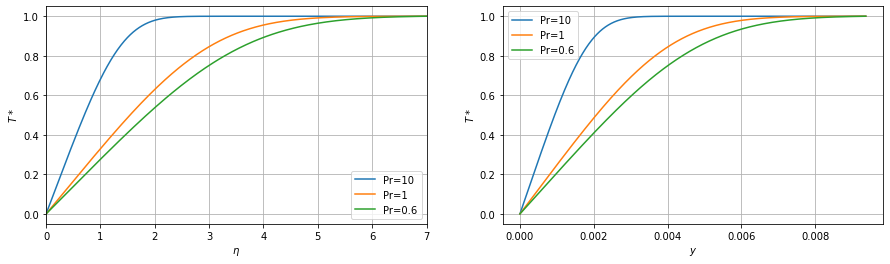

In [9]:
ui    = 0.01
nu    = 0.00000179
x0    = 0.01
eta   = np.linspace(0,7,ETA)
y     = eta/np.sqrt(ui/(nu*x0))

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))

ax1.plot(Tbl1.n,Tbl1.dTdn,label='Pr=10')
ax1.plot(Tbl2.n,Tbl2.dTdn,label='Pr=1')
ax1.plot(Tbl3.n,Tbl3.dTdn,label='Pr=0.6')
ax1.set_xlabel("$\eta$")
ax1.set_ylabel("$T*$")
ax1.grid()
ax1.legend()
ax1.set_xlim(0,7)

ax2.plot(y,Tbl1.dTdn,label='Pr=10')
ax2.plot(y,Tbl2.dTdn,label='Pr=1')
ax2.plot(y,Tbl3.dTdn,label='Pr=0.6')
ax2.set_xlabel("$y$")
ax2.set_ylabel("$T*$")
ax2.grid()
ax2.legend()
#ax2.set_xlim(0,7)

plt.show()

Explicar los efectos de $Pr$ en la gráfica de la temperatura $T^*(y)$

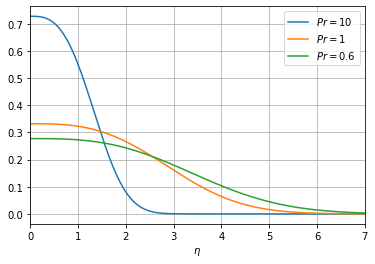

In [10]:
plt.plot(eta,fT1[:,4],label="$Pr=10$")
plt.plot(eta,fT2[:,4],label="$Pr=1$")
plt.plot(eta,fT3[:,4],label="$Pr=0.6$")
plt.xlabel("$\eta$")
plt.grid()
plt.legend()
plt.xlim(0,7)
plt.show()